In [ ]:

import pandas as pd

# Load the dataset again
file_path_new = 'original.csv'
data_new = pd.read_csv(file_path_new)

# Display the first few rows and column names to understand the structure of the data
data_new.head(), data_new.columns


(   Gender   Age  POLAR4 Quintile  POLAR3 Quintile  Adult HE 2001 Quintile  \
 0     0.0  38.0              5.0              5.0                     4.0   
 1     0.0  22.0              4.0              2.0                     1.0   
 2     0.0  21.0              4.0              5.0                     4.0   
 3     0.0  25.0              5.0              4.0                     3.0   
 4     0.0  20.0              5.0              4.0                     3.0   
 
    Adult HE 2011 Quintile  TUNDRA MSOA Quintile  TUNDRA LSOA Quintile  \
 0                     5.0                   4.0                   4.0   
 1                     3.0                   4.0                   4.0   
 2                     5.0                   4.0                   4.0   
 3                     4.0                   3.0                   3.0   
 4                     4.0                   3.0                   3.0   
 
    Gaps GCSE Quintile   Gaps GCSE Ethnicity Quintile  ...  \
 0                  5.

In [ ]:
# Reimport necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Import SimpleImputer to handle missing values
from sklearn.impute import SimpleImputer

# Drop unnecessary columns
data_cleaned = data_new.drop(columns=['Unnamed: 20', 'Unnamed: 21', 'POLAR4 Quintile', 'POLAR3 Quintile',
                                      'Adult HE 2001 Quintile', 'Adult HE 2011 Quintile', 'TUNDRA MSOA Quintile',
                                      'TUNDRA LSOA Quintile', 'Uni Connect target ward', 'attending from home?'])

# Selected relevant features
selected_features = ['Gender', 'Age', 'distance to university (km)', 'Count of Module Area Logins',
                     'Total Hours in Module Area', '% of Average Hours in Module Area', '# of presence',
                     '# of Absence', 'Percent Attended']
target_variable = 'label (fail=1, pass=0)'

# Prepare feature matrix (X) and target vector (Y)
X = data_cleaned[selected_features]
Y = data_cleaned[target_variable]

# Encoding categorical features (Gender)
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])

# Remove rows with missing values in the target variable
# This line is added to drop rows where the target variable is NaN
data_cleaned = data_cleaned.dropna(subset=[target_variable])
X = data_cleaned[selected_features]
Y = data_cleaned[target_variable]

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Dictionary to hold the models
models = {
    "Decision Tree (J48)": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    # Predict on the test set
    Y_pred = model.predict(X_test)
    # Calculate accuracy

    accuracy = accuracy_score(Y_test, Y_pred)
    results[model_name] = accuracy

results

<ipython-input-10-233bd9c27c28>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = LabelEncoder().fit_transform(X['Gender'])


{'Decision Tree (J48)': 0.875,
 'SVM': 0.8125,
 'Naive Bayes': 0.5,
 'KNN': 0.8125,
 'Logistic Regression': 0.875,
 'Random Forest': 0.8125}

In [ ]:
# Fill missing numerical columns with their mean
data_cleaned.fillna({
    'Age': data_cleaned['Age'].mean(),
    'distance to university (km)': data_cleaned['distance to university (km)'].mean(),
    'Count of Module Area Logins': data_cleaned['Count of Module Area Logins'].mean(),
    'Total Hours in Module Area': data_cleaned['Total Hours in Module Area'].mean(),
    '% of Average Hours in Module Area': data_cleaned['% of Average Hours in Module Area'].mean(),
    '# of presence': data_cleaned['# of presence'].mean(),
    '# of Absence': data_cleaned['# of Absence'].mean(),
    'Percent Attended': data_cleaned['Percent Attended'].mean(),
}, inplace=True)


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Example: Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, Y_train)

# Make predictions
Y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.88


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'data_cleaned' is your DataFrame with potential missing values
# ... (Your previous code for data loading and cleaning) ...

# Create features (X) and target (Y)
# ... (Your code to define X and Y) ...

# Impute missing values using SimpleImputer before splitting
imputer = SimpleImputer(strategy='mean') # You can choose other strategies like 'median'
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets AFTER imputation
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42)

# Train SVM
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, Y_train)
Y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.81


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)
Y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")


Naive Bayes Accuracy: 0.50


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train kNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
Y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"kNN Accuracy: {accuracy_knn:.2f}")


kNN Accuracy: 0.81


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, Y_train)
Y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")


Logistic Regression Accuracy: 0.88


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)
Y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.81


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_classifier = RandomForestClassifier(random_state=42)

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, Y_train)

# Best hyperparameters and best score
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")
print(f"Best Accuracy Score: {grid_search_rf.best_score_:.2f}")

# Use the best model for predictions
best_rf_model = grid_search_rf.best_estimator_
Y_pred_rf = best_rf_model.predict(X_test)

# Evaluate accuracy on test data
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Test Accuracy with best Random Forest: {accuracy_rf:.2f}")


Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy Score: 0.89
Test Accuracy with best Random Forest: 0.81


In [ ]:
pip install seaborn matplotlib scikit-learn


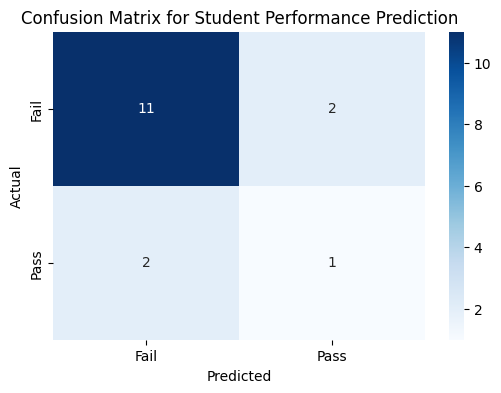

In [ ]:
import pandas as pd  # Import pandas to read your dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer  # Import SimpleImputer to handle missing data

# 1. Load your data
data = pd.read_csv('original.csv')

# Drop unnecessary or empty columns
data = data.drop(['Unnamed: 20', 'Unnamed: 21'], axis=1, errors='ignore')

# Ensure the target column has a consistent name and no missing values
target_variable = 'label (fail=1, pass=0)'
data = data.dropna(subset=[target_variable])  # Drop rows where the target variable is NaN

# 2. Define features (X) and target (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Handle missing data with SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance with strategy='mean'
X_train = imputer.fit_transform(X_train)  # Fit the imputer on training data and transform it
X_test = imputer.transform(X_test)  # Transform the test data using the fitted imputer

# 5. Train and predict using a model (e.g., Logistic Regression)
model = LogisticRegression(random_state=42, max_iter=1000)  # Initialize your model
model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)  # Make predictions on the test set

# 6. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 7. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Student Performance Prediction')
plt.show()


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        13
         1.0       1.00      0.67      0.80         3

    accuracy                           0.94        16
   macro avg       0.96      0.83      0.88        16
weighted avg       0.94      0.94      0.93        16



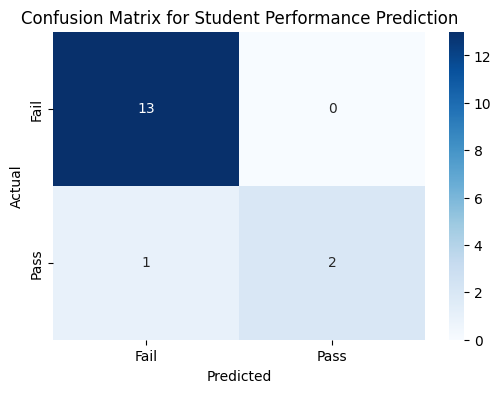

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your data
data = pd.read_csv('original.csv')

# Drop empty or unnecessary columns
data = data.drop(['Unnamed: 20', 'Unnamed: 21'], axis=1, errors='ignore')

# Ensure target column is clean (no NaN values)
target_variable = 'label (fail=1, pass=0)'
data = data.dropna(subset=[target_variable])

# 2. Define features (X) and target (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Handle missing data using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 5. Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Train the model using RandomForestClassifier with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 8. Make predictions on the test set
y_pred = best_model.predict(X_test)

# 9. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Student Performance Prediction')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import joblib

# Load your data
data = pd.read_csv('original.csv')

# Drop unnecessary columns
data = data.drop(['Unnamed: 20', 'Unnamed: 21'], axis=1, errors='ignore')

# Ensure target column is clean
target_variable = 'label (fail=1, pass=0)'
data = data.dropna(subset=[target_variable])

# Define features (X) and target (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing data
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train the model using RandomForest with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Assign the best model
best_model = grid_search.best_estimator_

# Save the model, imputer, and scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and transformers saved successfully!")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model and transformers saved successfully!


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Documents/original.csv')

# Display the first few rows and column info
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             80 non-null     float64
 1   Age                                80 non-null     float64
 2   POLAR4 Quintile                    80 non-null     float64
 3   POLAR3 Quintile                    80 non-null     float64
 4   Adult HE 2001 Quintile             80 non-null     float64
 5   Adult HE 2011 Quintile             80 non-null     float64
 6   TUNDRA MSOA Quintile               80 non-null     float64
 7   TUNDRA LSOA Quintile               80 non-null     float64
 8   Gaps GCSE Quintile                 80 non-null     float64
 9   Gaps GCSE Ethnicity Quintile       80 non-null     float64
 10  Uni Connect target ward            80 non-null     float64
 11  attending from home?               80 non-null     float64
 

(   Gender   Age  POLAR4 Quintile  POLAR3 Quintile  Adult HE 2001 Quintile  \
 0     0.0  38.0              5.0              5.0                     4.0   
 1     0.0  22.0              4.0              2.0                     1.0   
 2     0.0  21.0              4.0              5.0                     4.0   
 3     0.0  25.0              5.0              4.0                     3.0   
 4     0.0  20.0              5.0              4.0                     3.0   
 
    Adult HE 2011 Quintile  TUNDRA MSOA Quintile  TUNDRA LSOA Quintile  \
 0                     5.0                   4.0                   4.0   
 1                     3.0                   4.0                   4.0   
 2                     5.0                   4.0                   4.0   
 3                     4.0                   3.0                   3.0   
 4                     4.0                   3.0                   3.0   
 
    Gaps GCSE Quintile   Gaps GCSE Ethnicity Quintile  ...  \
 0                  5.

In [3]:
# Drop irrelevant columns (empty ones)
data_cleaned = data.drop(['Unnamed: 20', 'Unnamed: 21'], axis=1)

# Handle missing values by filling with the column means
data_cleaned.fillna(data_cleaned.mean(), inplace=True)

# Separate features (X) and target (y)
X = data_cleaned.drop('label (fail=1, pass=0)', axis=1)
y = data_cleaned['label (fail=1, pass=0)']

# Perform train-test split (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((69, 19), (18, 19))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer
import numpy as np

# Remove unnamed columns and any column with null values
# Assuming "data" is your original DataFrame
data_cleaned = data.drop(columns=[col for col in data.columns if 'Unnamed' in col or data[col].isnull().all()])


# Separate features and target variable
X = data_cleaned.drop(columns=["label (fail=1, pass=0)"])
y = data_cleaned["label (fail=1, pass=0)"]

# Remove rows where the target variable is NaN
# This ensures both X and y are consistent after dropping rows.
data_cleaned = data_cleaned.dropna(subset=['label (fail=1, pass=0)'])
X = data_cleaned.drop(columns=["label (fail=1, pass=0)"])
y = data_cleaned["label (fail=1, pass=0)"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values before scaling # New: Imputation step
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Elastic Net with cross-validation to determine optimal alpha and l1_ratio
elastic_net = ElasticNetCV(cv=5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# Get the selected features by Elastic Net
selected_features = np.array(X.columns)[elastic_net.coef_ != 0]
print(selected_features.sum())
# Display the selected features
selected_features


GenderAgePOLAR4 QuintileAdult HE 2001 QuintileGaps GCSE Quintile Uni Connect target wardattending from home?distance to university (km)Count of Module Area LoginsTotal Hours in Module Area% of Average Hours in Module Area# of AbsencePercent Attended


array(['Gender', 'Age', 'POLAR4 Quintile', 'Adult HE 2001 Quintile',
       'Gaps GCSE Quintile ', 'Uni Connect target ward',
       'attending from home?', 'distance to university (km)',
       'Count of Module Area Logins', 'Total Hours in Module Area',
       '% of Average Hours in Module Area', '# of Absence',
       'Percent Attended'], dtype=object)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        13
         1.0       1.00      0.67      0.80         3

    accuracy                           0.94        16
   macro avg       0.96      0.83      0.88        16
weighted avg       0.94      0.94      0.93        16



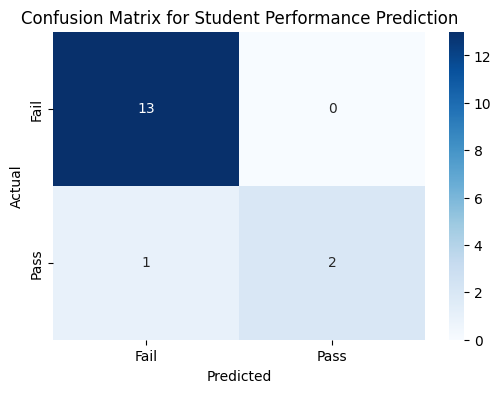

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# Drop empty or unnecessary columns
#data = data.drop(['Unnamed: 20', 'Unnamed: 21'], axis=1, errors='ignore')

# Ensure target column is clean (no NaN values)
target_variable = 'label (fail=1, pass=0)'
#data = data.dropna(subset=[target_variable])

# 2. Define features (X) and target (y)
#X = data.drop(target_variable, axis=1)
#y = data[target_variable]

# 3. Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Handle missing data using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 5. Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Train the model using RandomForestClassifier with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 8. Make predictions on the test set
y_pred = best_model.predict(X_test)

# 9. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Student Performance Prediction')
plt.show()
